<a href="https://colab.research.google.com/github/naginyan/Logistic_practice/blob/Sokey_Re/Logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import random
import csv
import math
import scipy as scp
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

def open_csv_to_float_colabo(file_path):
    with open('drive/My Drive/Colab Notebooks/sample_data/'+file_path, 'r') as f:
        data = csv.reader(f)
        data = list(data)
    return np.array(data).T.astype(float)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
open_csv_to_float_colabo('Logistic_data01.csv')

array([[-4.87581636, -4.658187  , -4.51289236, -4.39007125, -4.08184911,
        -4.0630699 , -3.88043383, -3.85444863, -3.60482784, -2.68858219,
        -2.58678507, -2.45076077, -2.0460884 , -1.974663  , -1.62599282,
        -1.27933679, -0.9464197 , -0.89865763, -0.85186305, -0.74487188,
        -0.43049299, -0.3566026 , -0.27098045, -0.24878922,  0.86081875,
         0.91468831,  1.36412997,  1.40518127,  1.53098065,  1.88601623,
         1.98652032,  2.02819779,  2.093194  ,  2.24747556,  2.28920006,
         2.31364328,  2.36580465,  2.60255676,  2.83909747,  2.88904976,
         3.00994393,  3.02801168,  3.09671962,  3.11972978,  3.42375202,
         3.43571724,  3.48724704,  3.49345973,  3.53738912,  3.58242898,
         3.85941285,  3.88769192,  4.0498554 ,  4.10980144,  4.12305723,
         4.12968533,  4.13003861,  4.20948417,  4.29263659,  4.298131  ,
         4.33281581,  4.5512455 ,  4.59944758,  4.67716364,  4.93859879,
         4.9587921 ,  5.0133345 ,  5.15633814,  5.2

In [ ]:
A = open_csv_to_float_colabo('Logistic_data01.csv').T
print(A)

[[-4.87581636  1.        ]
 [-4.658187    1.        ]
 [-4.51289236  1.        ]
 [-4.39007125  1.        ]
 [-4.08184911  1.        ]
 [-4.0630699   1.        ]
 [-3.88043383  1.        ]
 [-3.85444863  1.        ]
 [-3.60482784  1.        ]
 [-2.68858219  1.        ]
 [-2.58678507  1.        ]
 [-2.45076077  1.        ]
 [-2.0460884   1.        ]
 [-1.974663    1.        ]
 [-1.62599282  1.        ]
 [-1.27933679  1.        ]
 [-0.9464197   1.        ]
 [-0.89865763  1.        ]
 [-0.85186305  1.        ]
 [-0.74487188  1.        ]
 [-0.43049299  1.        ]
 [-0.3566026   1.        ]
 [-0.27098045  1.        ]
 [-0.24878922  1.        ]
 [ 0.86081875  1.        ]
 [ 0.91468831  1.        ]
 [ 1.36412997  1.        ]
 [ 1.40518127  1.        ]
 [ 1.53098065  0.        ]
 [ 1.88601623  0.        ]
 [ 1.98652032  0.        ]
 [ 2.02819779  0.        ]
 [ 2.093194    1.        ]
 [ 2.24747556  0.        ]
 [ 2.28920006  1.        ]
 [ 2.31364328  0.        ]
 [ 2.36580465  0.        ]
 

In [ ]:
list_1 = []
list_0 = []
for i in range(len(A)):
    if A[i][1]==1:
        list_1.append(A[i])
    else:
        list_0.append(A[i])

B = np.array(list_1).T 
C = np.array(list_0).T 
print(np.array(list_1).T)
print(np.array(list_0).T)

[[-4.87581636 -4.658187   -4.51289236 -4.39007125 -4.08184911 -4.0630699
  -3.88043383 -3.85444863 -3.60482784 -2.68858219 -2.58678507 -2.45076077
  -2.0460884  -1.974663   -1.62599282 -1.27933679 -0.9464197  -0.89865763
  -0.85186305 -0.74487188 -0.43049299 -0.3566026  -0.27098045 -0.24878922
   0.86081875  0.91468831  1.36412997  1.40518127  2.093194    2.28920006]
 [ 1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.        ]]
[[1.53098065 1.88601623 1.98652032 2.02819779 2.24747556 2.31364328
  2.36580465 2.60255676 2.83909747 2.88904976 3.00994393 3.02801168
  3.09671962 3.11972978 3.42375202 3.43571724 3.48724704 3.49345973
  3.53738912 3.58242898 3.85941285 3.88769192 4.0498554  4.10980144
  4.12305723 4.129

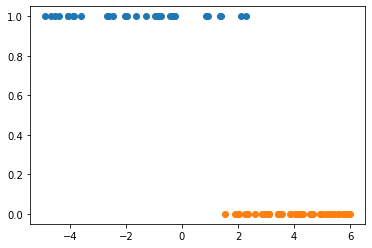

In [ ]:
plt.plot(B[0],B[1],'o')
plt.plot(C[0],C[1],'o')

#最尤推定

In [ ]:
x,y = A[1]

In [ ]:
w0=1
w1=1
f = ((math.e**(w0+w1*x))/(1+math.e**(w0+w1*x)))**1
print(f)

0.02513134204268933


In [ ]:
def f(w0,w1,list_):
    list_0 = []
    for i in range(len(list_)):
        list_0.append(list_[i][1]*(w0+w1*list_[i][0])-math.log(1+math.e**(w0+w1*list_[i][0])))
     
    A = np.sum(list_0)
    return A 